In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel("Data/Train_dataset.xlsx")

In [9]:
## See first few rows of dataset#####
df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1,Farmer,Public,2,...,93,233,82,58,27,7,3600000,1300000,2,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2,Farmer,Walk,2,...,56,328,89,68,5,6,1600000,400000,1,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1,Cleaner,Public,2,...,137,213,77,43,40,6,3400000,900000,1,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1,Driver,Car,2,...,167,275,64,60,27,7,700000,2300000,1,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2,Manufacturing,Car,2,...,153,331,71,64,32,7,3200000,1100000,1,87.868800


In [11]:
## See all columns of the dataset ####
df.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Designation,Mrs,Mrs,Mrs,Mrs,Mrs
Name,mansi,riya masi,sunita,anjali @ babli,champa karketta
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2


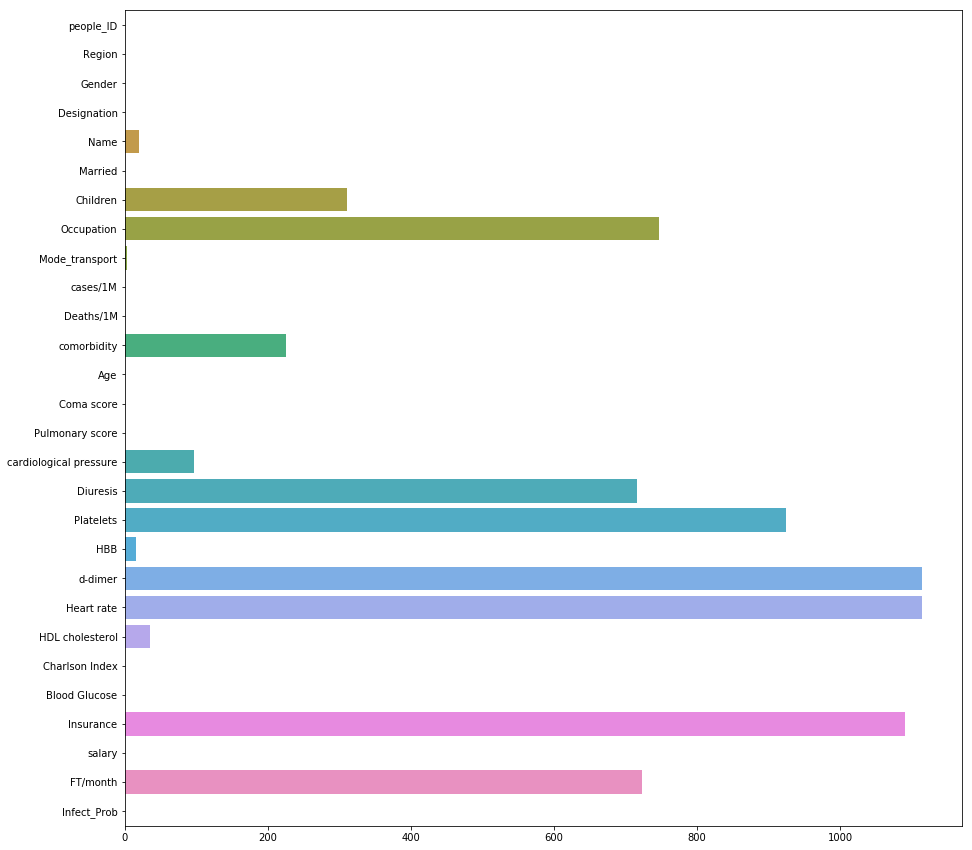

In [33]:
### Count total number of missing values ####
null = df.isnull().sum()
plt.figure(figsize=(15,15))
sns.barplot(x=null.values,y=null.index,orient="h")

In [29]:
null


people_ID                    0
Region                       0
Gender                       0
Designation                  0
Name                        20
Married                      0
Children                   311
Occupation                 747
Mode_transport               3
cases/1M                     0
Deaths/1M                    0
comorbidity                226
Age                          0
Coma score                   0
Pulmonary score              0
cardiological pressure      97
Diuresis                   716
Platelets                  924
HBB                         16
d-dimer                   1114
Heart rate                1114
HDL cholesterol             35
Charlson Index               0
Blood Glucose                0
Insurance                 1090
salary                       0
FT/month                   723
Infect_Prob                  0
dtype: int64

In [41]:
df.shape

(10714, 28)

# Let's divide the data into two parts:

* Part A: Normal Data Features
 Features Included: Region, Gender, Designation,Name,Married,Children,Age,Occupation etc.
 
* Part B: Medical Data Features
 Features Included: Coma Score, Pulmonary Score,Cardiological Pressure,Diuresis,Platelets HBB,d-dimer etc.
 
 Now let's independently analyze the effects of these features on the infection probability


In [138]:
normie_df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,24,25,26,27]]
medical_df = df.iloc[:,[0,13,14,15,16,17,18,19,20,21,22,23,27]]
labels = df.iloc[:,-1]

In [139]:
normie_df.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Designation,Mrs,Mrs,Mrs,Mrs,Mrs
Name,mansi,riya masi,sunita,anjali @ babli,champa karketta
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2


In [57]:
medical_df.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Coma score,8,15,13,9,7
Pulmonary score,<400,<100,<300,<200,<400
cardiological pressure,Normal,Stage-02,Elevated,Stage-01,Normal
Diuresis,441,NaN,416,410,390
Platelets,154,121,124,98,21
HBB,93,56,137,167,153
d-dimer,233,328,213,275,331
Heart rate,82,89,77,64,71
HDL cholesterol,58,68,43,60,64


In [54]:
labels.head()

0    49.135010
1    51.147880
2    73.224000
3    48.779225
4    87.868800
Name: Infect_Prob, dtype: float64

# Analyzing Normal Data
Designation seems like a useless feature since married and gender cover it. So we can eliminate it easily

In [140]:
normie_df = normie_df.drop(["Designation"],axis=1)

In [61]:
normie_df.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Name,mansi,riya masi,sunita,anjali @ babli,champa karketta
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2
Deaths/1M,0,0,0,0,0


# Step 1: Remove clearly redundant features

* Cases/1M is the same for every place name. Clearly the feature can be used as a worthy label encoder for the place name since its magnitude is useful in this case i.e more the nunber of cases in the place more the probability of infection.

* Designation is a combination of marriage status and gender. Hence we can remove that too.

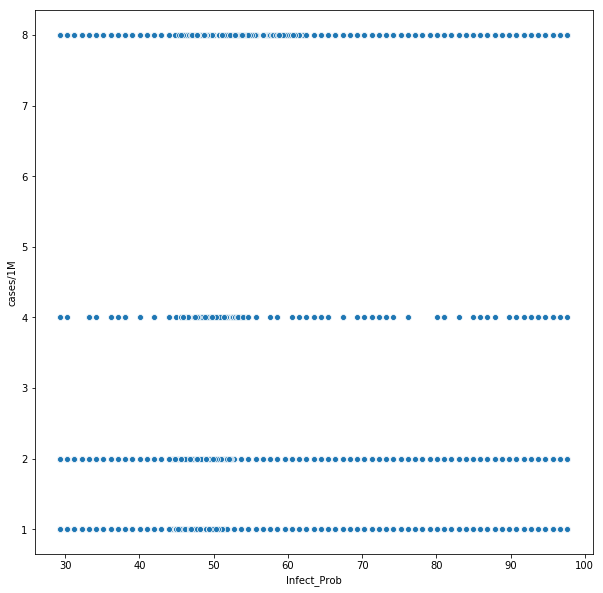

In [141]:
normie_df = normie_df.drop(labels=["Name"],axis=1)


fig = plt.figure(figsize=(10,10))

sns.scatterplot(x="Infect_Prob",y="cases/1M",data=normie_df)

In [201]:
normie_df.head().transpose()

,0,1,2,3,4
people_ID,1,2,3,4,5
Region,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar,Bhubaneshwar
Gender,Female,Female,Female,Female,Female
Married,YES,YES,NO,YES,NO
Children,1,2,1,1,2
Occupation,Farmer,Farmer,Cleaner,Driver,Manufacturing
Mode_transport,Public,Walk,Public,Car,Car
cases/1M,2,2,2,2,2
Deaths/1M,0,0,0,0,0
comorbidity,Hypertension,Diabetes,None,Coronary Heart Disease,Diabetes


In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(normie_df.iloc[:,:27],labels)

In [142]:
normie_df = normie_df.dropna()

In [204]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
def transform(data,indices,choice=None):
    onehot = OneHotEncoder()
    le = LabelEncoder()
    new_df = {}
    for index in  indices:
        temp_df = data.iloc[:,index]
        print(index)
        temp_df = temp_df.reshape(-1,1)
        print(temp_df.shape)
        if(choice==0):
            temp_df = le.fit_transform(temp_df)
        elif(choice==1):
            t_temp_df = le.fit_transform(temp_df)
            t_temp_df = t_temp_df.reshape(-1,1)
            temp_df = onehot.fit_transform(t_temp_df)
        new_df[data.columns[index]] = temp_df
        print(new_df)
    return new_df
    
    

In [207]:
new_df = transform(normie_df,[2,3,6,5,9],0)
clone = normie_df.copy()

2
(8710, 1)
{'Gender': array([0, 0, 0, ..., 1, 1, 1])}
3
(8710, 1)
{'Gender': array([0, 0, 0, ..., 1, 1, 1]), 'Married': array([1, 1, 0, ..., 1, 1, 0])}
6
(8710, 1)
{'Gender': array([0, 0, 0, ..., 1, 1, 1]), 'Married': array([1, 1, 0, ..., 1, 1, 0]), 'Mode_transport': array([1, 2, 1, ..., 1, 2, 0])}
5
(8710, 1)
{'Gender': array([0, 0, 0, ..., 1, 1, 1]), 'Occupation': array([4, 4, 1, ..., 2, 5, 0]), 'Married': array([1, 1, 0, ..., 1, 1, 0]), 'Mode_transport': array([1, 2, 1, ..., 1, 2, 0])}
9
(8710, 1)
{'Gender': array([0, 0, 0, ..., 1, 1, 1]), 'comorbidity': array([2, 1, 3, ..., 1, 0, 1]), 'Occupation': array([4, 4, 1, ..., 2, 5, 0]), 'Married': array([1, 1, 0, ..., 1, 1, 0]), 'Mode_transport': array([1, 2, 1, ..., 1, 2, 0])}


In [208]:
for key in new_df.keys():
    clone[key] = new_df[key]

In [210]:
clone = clone.drop(labels=["Region"],axis=1)

In [211]:
clone.head().transpose()

,0,1,2,3,4
people_ID,1.00000,2.00000,3.000,4.000000,5.0000
Gender,0.00000,0.00000,0.000,0.000000,0.0000
Married,1.00000,1.00000,0.000,1.000000,0.0000
Children,1.00000,2.00000,1.000,1.000000,2.0000
Occupation,4.00000,4.00000,1.000,3.000000,6.0000
Mode_transport,1.00000,2.00000,1.000,0.000000,0.0000
cases/1M,2.00000,2.00000,2.000,2.000000,2.0000
Deaths/1M,0.00000,0.00000,0.000,0.000000,0.0000
comorbidity,2.00000,1.00000,3.000,0.000000,1.0000
Age,68.00000,64.00000,19.000,33.000000,23.0000


In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(clone.iloc[:,:-1],clone.iloc[:,-1])

In [232]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
model1 = LinearRegression()
model2 = Lasso()
model3 = ElasticNet()
model3.fit(X_train,Y_train)
y_pred = model3.predict(X_test)

In [233]:
from sklearn.metrics import r2_score
r2_score(y_pred,Y_test)

-3.9033433139770324